In [58]:
%matplotlib inline
import numpy as np
import sys
sys.path.append('../src')
from sampling import NestedSampling, Uniform, Callback

In [59]:
data = [4.73, 0.45, -1.73, 1.09, 2.19, 0.12,
        1.31, 1.00, 1.32, 1.07, 0.86, -0.49, -2.59, 1.73, 2.11,
        1.61, 4.98, 1.71, 2.23, -57.20, 0.96, 1.25, -1.56, 2.45,
        1.19, 2.17, -10.66, 1.91, -4.16, 1.92, 0.10, 1.98, -2.51,
        5.55, -0.47, 1.91, 0.95, -0.78, -0.84, 1.72, -0.01, 1.48,
        2.70, 1.21, 4.41, -4.79, 1.33, 0.81, 0.20, 1.58, 1.29,
        16.19, 2.75, -2.38, -1.79, 6.50, -18.53, 0.72, 0.94, 3.64,
        1.94, -0.11, 1.57, 0.57]

In [60]:
class PyCallback(Callback):

    def __init__(self, data):
        Callback.__init__(self)
        self.data = data

    def set_data(self, data):
        self.data = data

    def run(self, vals):
        x = vals[0]
        y = vals[1]
        N = len(self.data)
        logL = 0
        for k in range(0, N):
            logL += np.log((y / np.pi) /
                           ((self.data[k] - x) * (self.data[k] - x) + y * y))
        return logL

In [61]:
x = Uniform('x', -2., 2.)
y = Uniform('y', 0., 2.)
ns = NestedSampling()
pycb = PyCallback(data)
pycb.__disown__()
ns.setCallback(pycb)
rs = ns.explore(vars=[x, y], initial_samples=100,
                maximum_steps=1000)

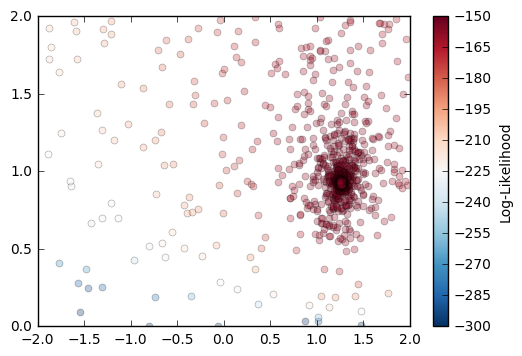

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import Normalize
cmap = cm.ScalarMappable(norm=Normalize(vmin=-300, vmax=-150), cmap='RdBu_r')
logLs = []
smp = rs.get_samples()
for _s in smp:
    cl = cmap.to_rgba(_s.logL)
    logLs.append(_s.logL)
    x = _s._vars[0].get_value()
    y = _s._vars[1].get_value()
    plt.plot(x,y,ms=5,c=cl,marker='o',alpha=0.3)
cmap.set_array(logLs)
cb = plt.colorbar(cmap)
cb.set_label('Log-Likelihood')